In [2]:
# libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
# read in data files
path = 'C:/Users/nipun/Documents/Jupyter/Machine Learning Exercises/data/ex1data1.txt'
data = pd.read_csv(path, header = None, names = ["Population", "Profit"])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


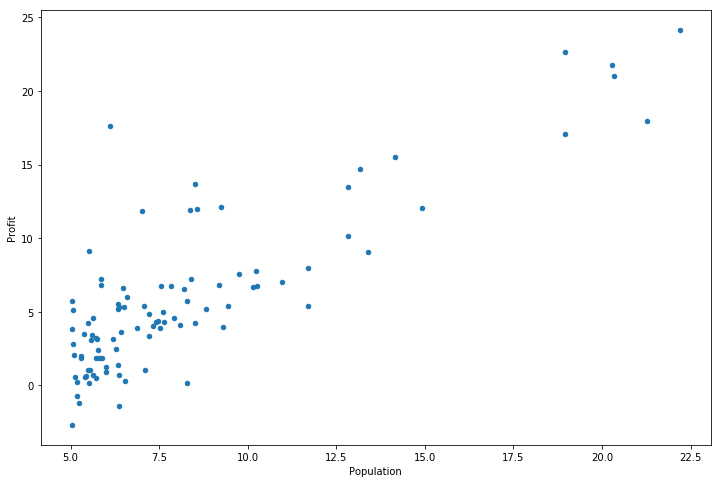

In [76]:
data.plot(kind = "scatter", 
          x = "Population", y = "Profit",
         figsize = (12,8))

In [50]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [51]:
data.insert(0, "Ones", 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [52]:
# formulating training and testing data sets
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]     # testing
y = data.iloc[:,cols-1:cols]  # training

In [53]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

print(X.shape, y.shape, theta.shape)

(97, 2) (97, 1) (1, 2)


In [54]:
computeCost(X, y, theta)

32.072733877455676

In [58]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost
            

In [74]:
alpha = 0.01
iters = 1000

g, cost = gradientDescent(X, y, theta, alpha, iters)
print(g)

[[-3.24140214  1.1272942 ]]


In [61]:
computeCost(X,y,g)

4.515955503078912

Text(0.5,1,'Predict Profit vs Population size')

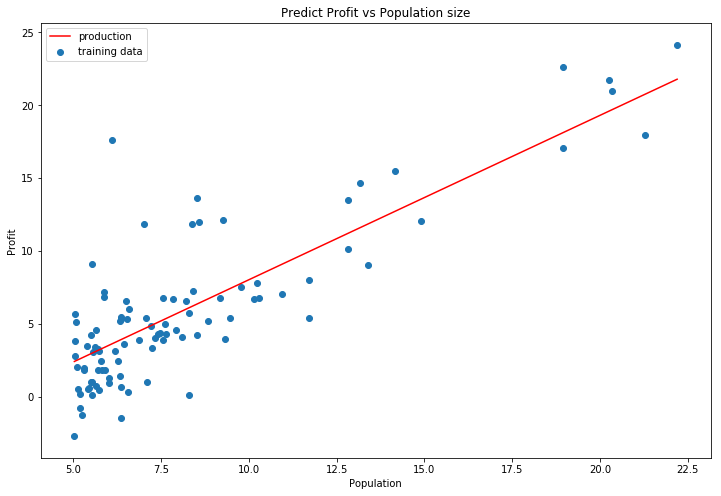

In [66]:
x = np.linspace(data.Population.min(), 
                data.Population.max(),
                100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x, f, "r", label = "production")
ax.scatter(data.Population, data.Profit,
          label = "training data")
ax.legend(loc = 2)
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title("Predict Profit vs Population size")                 

Text(0.5,1,'Error vs. Training Epoch')

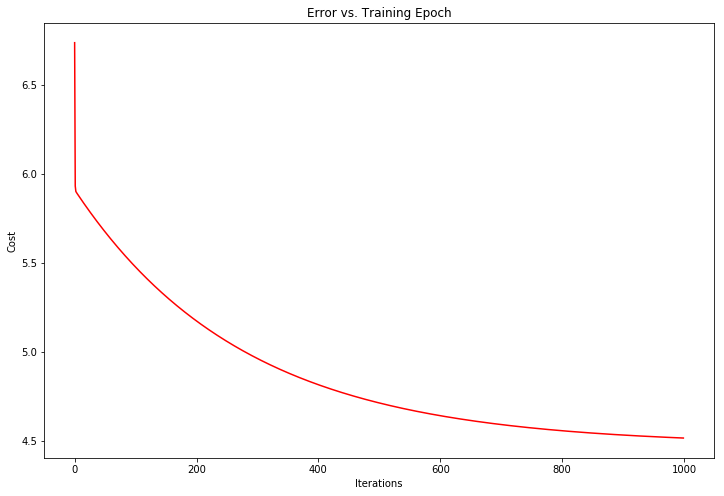

In [75]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  